# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric&lang=en"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | gadzhiyevo
Processing Record 3 of Set 1 | ancud
Processing Record 4 of Set 1 | island harbour
Processing Record 5 of Set 1 | ta`u
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | mukalla
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 11 of Set 1 | hamilton
Processing Record 12 of Set 1 | sarioglan
Processing Record 13 of Set 1 | polyarnyy
Processing Record 14 of Set 1 | karabash
Processing Record 15 of Set 1 | cuyo
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | tingi
Processing Record 19 of Set 1 | xilin hot
Processing Record 20 of Set 1 | constantia
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | alvand
Processin

Processing Record 42 of Set 4 | wanning
Processing Record 43 of Set 4 | laem sing
Processing Record 44 of Set 4 | sambava
Processing Record 45 of Set 4 | st. john's
Processing Record 46 of Set 4 | geidam
Processing Record 47 of Set 4 | laurens
Processing Record 48 of Set 4 | kyaikkami
Processing Record 49 of Set 4 | olyokminsk
Processing Record 0 of Set 5 | tilcara
Processing Record 1 of Set 5 | howard springs
Processing Record 2 of Set 5 | warmbad
Processing Record 3 of Set 5 | victoria point
Processing Record 4 of Set 5 | pariaman
Processing Record 5 of Set 5 | marsaskala
City not found. Skipping...
Processing Record 6 of Set 5 | luena
Processing Record 7 of Set 5 | terenozek
Processing Record 8 of Set 5 | cam ranh
Processing Record 9 of Set 5 | college
Processing Record 10 of Set 5 | sinabang
Processing Record 11 of Set 5 | papatowai
Processing Record 12 of Set 5 | papao
Processing Record 13 of Set 5 | howrah
Processing Record 14 of Set 5 | alofi
Processing Record 15 of Set 5 | beng

Processing Record 33 of Set 8 | yangor
City not found. Skipping...
Processing Record 34 of Set 8 | port saint john's
Processing Record 35 of Set 8 | ketchikan
Processing Record 36 of Set 8 | huarmey
Processing Record 37 of Set 8 | troitsko-pechorsk
Processing Record 38 of Set 8 | labytnangi
Processing Record 39 of Set 8 | jejuri
Processing Record 40 of Set 8 | rio preto da eva
Processing Record 41 of Set 8 | kalmunai
Processing Record 42 of Set 8 | camalu
Processing Record 43 of Set 8 | flin flon
Processing Record 44 of Set 8 | kamaishi
Processing Record 45 of Set 8 | dongola
Processing Record 46 of Set 8 | guixi
Processing Record 47 of Set 8 | hobyo
Processing Record 48 of Set 8 | vanino
Processing Record 49 of Set 8 | tromso
Processing Record 0 of Set 9 | aoulef
Processing Record 1 of Set 9 | saratamata
City not found. Skipping...
Processing Record 2 of Set 9 | ndjole
Processing Record 3 of Set 9 | puerto colombia
Processing Record 4 of Set 9 | jutai
Processing Record 5 of Set 9 | ne

Processing Record 22 of Set 12 | jijiga
Processing Record 23 of Set 12 | kataragama
City not found. Skipping...
Processing Record 24 of Set 12 | niquero
Processing Record 25 of Set 12 | buala
Processing Record 26 of Set 12 | bairnsdale
Processing Record 27 of Set 12 | ternate
Processing Record 28 of Set 12 | fortuna
Processing Record 29 of Set 12 | yoichi
Processing Record 30 of Set 12 | port macquarie
Processing Record 31 of Set 12 | phetchaburi
Processing Record 32 of Set 12 | belinskiy
Processing Record 33 of Set 12 | rajgarh
Processing Record 34 of Set 12 | mugia
Processing Record 35 of Set 12 | lompoc
Processing Record 36 of Set 12 | winnemucca
Processing Record 37 of Set 12 | luderitz
Processing Record 38 of Set 12 | murzuq
Processing Record 39 of Set 12 | brisas de zicatela
Processing Record 40 of Set 12 | maintirano
Processing Record 41 of Set 12 | estevan
Processing Record 42 of Set 12 | grand falls-windsor
Processing Record 43 of Set 12 | galesong
Processing Record 44 of Set 

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0       grytviken -54.2811  -36.5092      0.60        83          69   
1      gadzhiyevo  69.2551   33.3362     -2.81        62         100   
2           ancud -41.8697  -73.8203      6.57        94          97   
3  island harbour  50.7240   -1.2758     13.43        73         100   
4            ta`u -14.2336 -169.5144     28.67        81         100   

   Wind Speed Country        Date  
0        4.34      GS  1715035486  
1        7.54      RU  1715035486  
2        1.05      CL  1715035454  
3        1.79      GB  1715035487  
4        4.15      AS  1715035487

In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                      
0             grytviken -54.2811  -36.5092      0.60        83          69   
1            gadzhiyevo  69.2551   33.3362     -2.81        62         100   
2                 ancud -41.8697  -73.8203      6.57        94          97   
3        island harbour  50.7240   -1.2758     13.43        73         100   
4                  ta`u -14.2336 -169.5144     28.67        81         100   

         Wind Speed Country        Date  
City_ID                                  
0              4.34      GS  1715035486  
1              7.54      RU  1715035486  
2              1.05      CL  1715035454  
3              1.79      GB  1715035487  
4              4.15      AS  1715035487

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

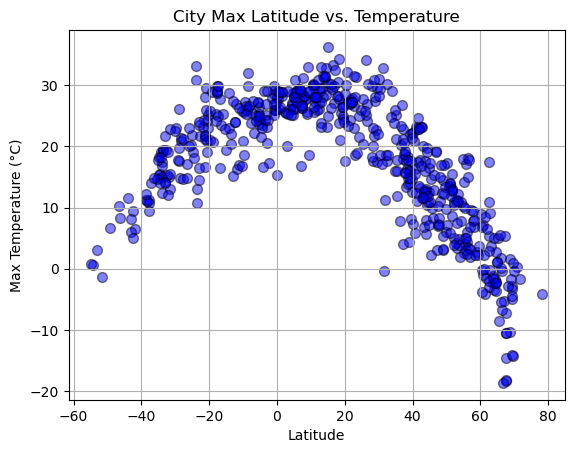

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], 
            color='blue', alpha=0.5, edgecolors='black', s=50)

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

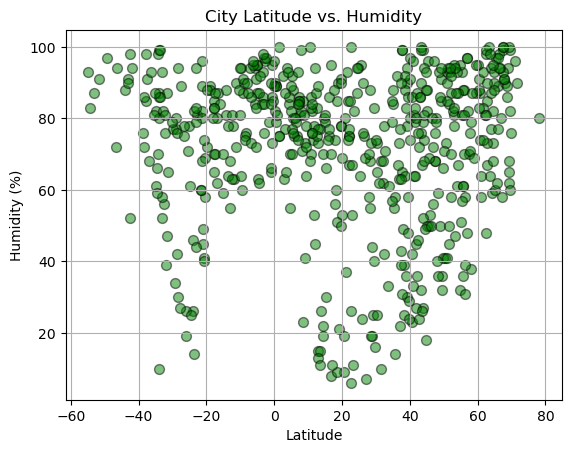

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], 
            color='green', alpha=0.5, edgecolors='black', s=50)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

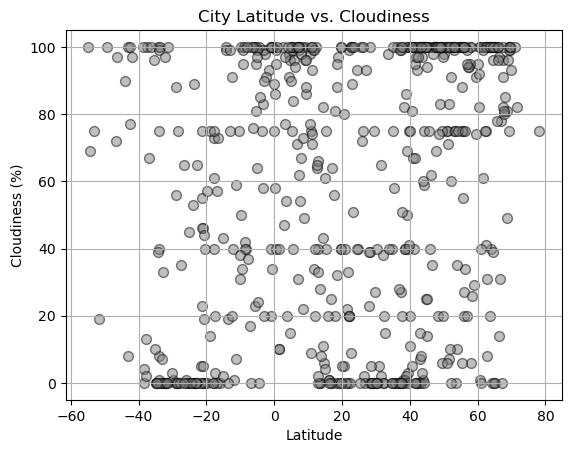

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], 
            color='grey', alpha=0.5, edgecolors='black', s=50)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

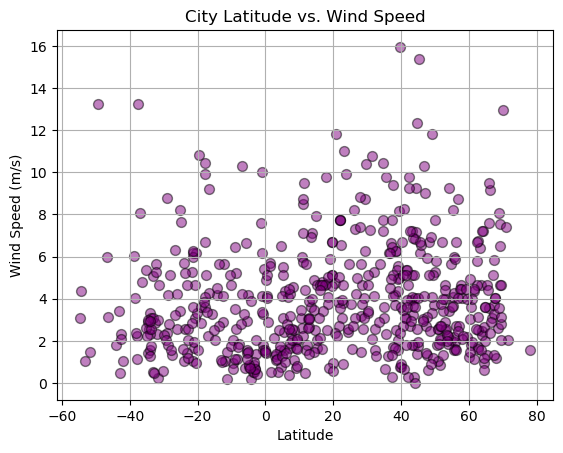

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], 
            color='purple', alpha=0.5, edgecolors='black', s=50)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title):
     # Calculate the linear regression
    (slope, intercept, rvalue, _, _) = linregress(x_values, y_values)
    
    # Calculate regression values to plot the line
    reg_values = x_values * slope + intercept

    # Create scatter plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, reg_values, "r-")  # red line for the regression line

    # Annotate the line equation on the plot
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                      
1            gadzhiyevo  69.2551   33.3362     -2.81        62         100   
3        island harbour  50.7240   -1.2758     13.43        73         100   
5                kodiak  57.7900 -152.4072      7.73        76         100   
6               mukalla  14.5425   49.1242     28.46        80           6   
9              hamilton  39.1834  -84.5333     21.97        90         100   

         Wind Speed Country        Date  
City_ID                                  
1              7.54      RU  1715035486  
3              1.79      GB  1715035487  
5              4.63      US  1715035487  
6              2.50      YE  1715035487  
9              2.06      US  1715035488

In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                         
0                grytviken -54.2811  -36.5092      0.60        83          69   
2                    ancud -41.8697  -73.8203      6.57        94          97   
4                     ta`u -14.2336 -169.5144     28.67        81         100   
7        port-aux-francais -49.3500   70.2167      6.71        97         100   
8                 waitangi -43.9535 -176.5597     11.57        88          90   

         Wind Speed Country        Date  
City_ID                                  
0              4.34      GS  1715035486  
2              1.05      CL  1715035454  
4              4.15      AS  1715035487  
7             13.22      TF  1715035376  
8              1.79      NZ  1715035487

###  Temperature vs. Latitude Linear Regression Plot

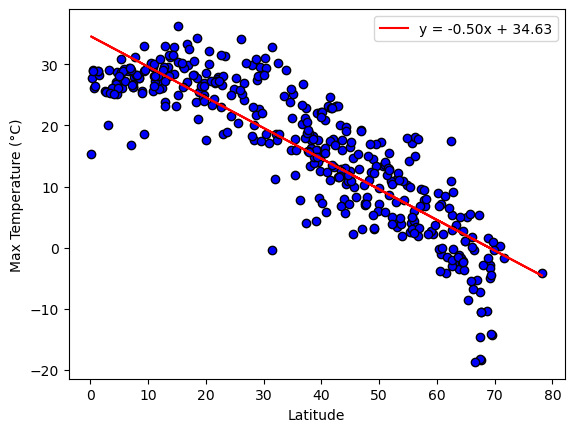

The r-value (correlation coefficient) is: -0.8719689492057391


In [34]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Perform linear regression
(slope, intercept, r_value, _, _) = linregress(x_values, y_values)

# Calculate the regression values for plotting
regression_line = x_values * slope + intercept

# Create a scatter plot
plt.scatter(x_values, y_values, color='blue', edgecolors='black')
plt.plot(x_values, regression_line, "r-", label=f"y = {slope:.2f}x + {intercept:.2f}")

# Annotate the plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.legend(loc='best')

# Show plot
plt.show()

# Print the R-value
print(f"The r-value (correlation coefficient) is: {r_value}")

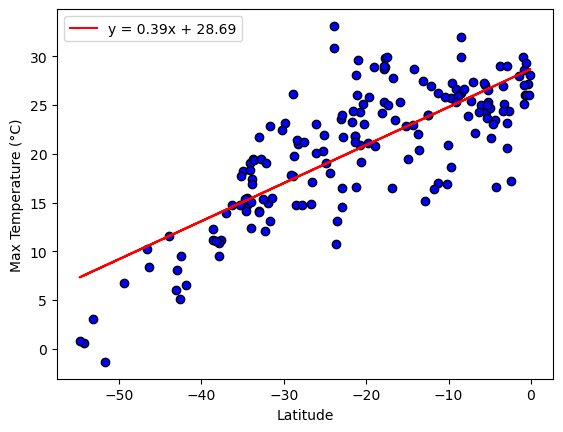

The r-value (correlation coefficient) is: 0.7795263313988307


In [35]:
# Linear regression on Southern Hemisphere
# Extract latitude and maximum temperature data
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Perform linear regression
(slope, intercept, r_value, _, _) = linregress(x_values, y_values)

# Calculate the regression values for plotting
regression_line = x_values * slope + intercept

# Create a scatter plot
plt.scatter(x_values, y_values, color='blue', edgecolors='black')
plt.plot(x_values, regression_line, "r-", label=f"y = {slope:.2f}x + {intercept:.2f}")

# Annotate the plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.legend(loc='best')

# Show plot
plt.show()

# Print the R-value
print(f"The r-value (correlation coefficient) is: {r_value}")

**Discussion about the linear relationship:**

Northern Hemisphere:
    The R-value of -0.87 indicates a strong negative correlation between temperature and latitude.
    The scatter plot shows a clear downtrend, meaning that as the latitude increases (moving away from the equator toward the poles), the temperature tends to decrease.
    This is consistent with the general climatic trend where regions further north (higher latitudes) tend to have colder climates.

Southern Hemisphere:
    The R-value of 0.77 shows a strong positive correlation between temperature and latitude.
    The scatter plot depicts a distinct upward trend, indicating that as latitude decreases (moving toward the equator from the southernmost regions), the temperature generally increases.
    This positive trend aligns with the expected climatic pattern where regions closer to the equator are generally warmer.

In summary, both hemispheres display clear linear relationships between temperature and latitude. While temperatures decrease with increasing latitude in the Northern Hemisphere, they increase with decreasing latitude in the Southern Hemisphere.



### Humidity vs. Latitude Linear Regression Plot

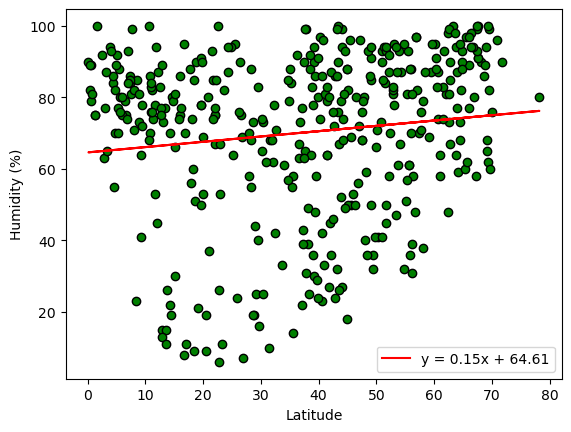

The r-value (correlation coefficient) is: 0.1293785898333329


In [36]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Perform linear regression
(slope, intercept, r_value, _, _) = linregress(x_values, y_values)

# Calculate the regression values for plotting
regression_line = x_values * slope + intercept

# Create a scatter plot
plt.scatter(x_values, y_values, color='green', edgecolors='black')
plt.plot(x_values, regression_line, "r-", label=f"y = {slope:.2f}x + {intercept:.2f}")

# Annotate the plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.legend(loc='best')

# Show plot
plt.show()

# Print the R-value
print(f"The r-value (correlation coefficient) is: {r_value}")

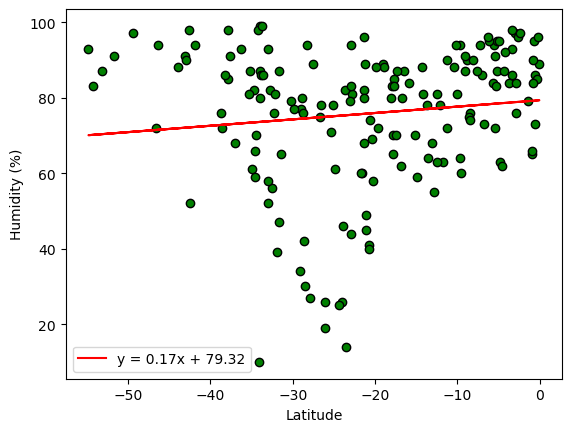

The r-value (correlation coefficient) is: 0.12205739187949663


In [37]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Perform linear regression
(slope, intercept, r_value, _, _) = linregress(x_values, y_values)

# Calculate the regression values for plotting
regression_line = x_values * slope + intercept

# Create a scatter plot
plt.scatter(x_values, y_values, color='green', edgecolors='black')
plt.plot(x_values, regression_line, "r-", label=f"y = {slope:.2f}x + {intercept:.2f}")

# Annotate the plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.legend(loc='best')

# Show plot
plt.show()

# Print the R-value
print(f"The r-value (correlation coefficient) is: {r_value}")

**Discussion about the linear relationship:**

Northern Hemisphere:
    The R-value of 0.12 indicates a very weak positive correlation between humidity and latitude.
    The scatter plot appears scattered with no clear trend, suggesting that changes in latitude do not significantly affect humidity in the Northern Hemisphere.
    This weak correlation implies that other factors may have more influence on humidity than latitude alone.

Southern Hemisphere:
    The R-value of 0.12 similarly indicates a very weak positive correlation between humidity and latitude.
    The scatter plot is scattered, showing no discernible pattern that connects latitude to humidity levels.
    As with the Northern Hemisphere, this weak correlation suggests that factors other than latitude primarily affect humidity levels in the Southern Hemisphere.

In summary, both hemispheres show a weak relationship between humidity and latitude, and no strong trends emerge from the data.

### Cloudiness vs. Latitude Linear Regression Plot

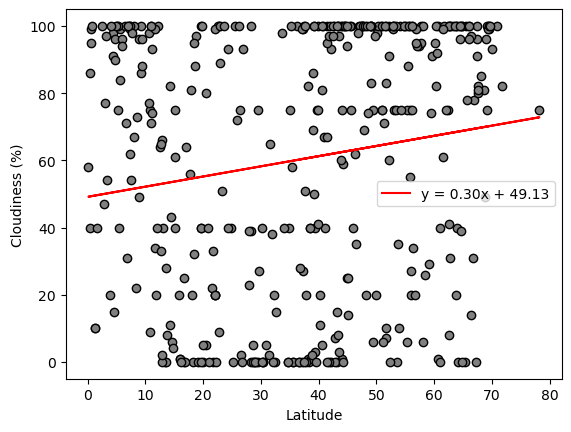

The r-value (correlation coefficient) is: 0.15631776287876634


In [38]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Perform linear regression
(slope, intercept, r_value, _, _) = linregress(x_values, y_values)

# Calculate the regression values for plotting
regression_line = x_values * slope + intercept

# Create a scatter plot
plt.scatter(x_values, y_values, color='grey', edgecolors='black')
plt.plot(x_values, regression_line, "r-", label=f"y = {slope:.2f}x + {intercept:.2f}")

# Annotate the plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.legend(loc='best')

# Show plot
plt.show()

# Print the R-value
print(f"The r-value (correlation coefficient) is: {r_value}")

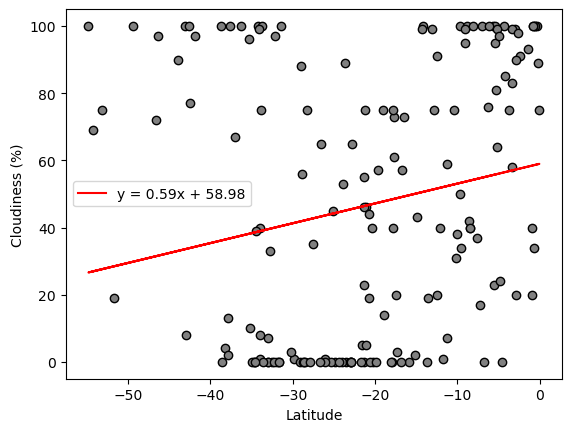

The r-value (correlation coefficient) is: 0.199808456152119


In [39]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Perform linear regression
(slope, intercept, r_value, _, _) = linregress(x_values, y_values)

# Calculate the regression values for plotting
regression_line = x_values * slope + intercept

# Create a scatter plot
plt.scatter(x_values, y_values, color='grey', edgecolors='black')
plt.plot(x_values, regression_line, "r-", label=f"y = {slope:.2f}x + {intercept:.2f}")

# Annotate the plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.legend(loc='best')

# Show plot
plt.show()

# Print the R-value
print(f"The r-value (correlation coefficient) is: {r_value}")

**Discussion about the linear relationship:**

Northern Hemisphere:
    The R-value of 0.15 indicates a weak positive correlation between cloudiness and latitude.
    The scatter plot is scattered, showing no clear pattern or trend. This suggests that latitude has little influence on cloudiness in the Northern Hemisphere.
    The weak correlation implies that other factors are more impactful in determining cloudiness levels.

Southern Hemisphere:
    The R-value of 0.19 also shows a weak positive correlation between cloudiness and latitude.
    The scatter plot is similarly scattered without a discernible trend, indicating that cloudiness is not strongly affected by latitude in the Southern Hemisphere.
    As with the Northern Hemisphere, this weak relationship emphasizes that other factors play a more significant role in influencing cloudiness.

In summary, the weak correlations in both hemispheres suggest that latitude is not a significant predictor of cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

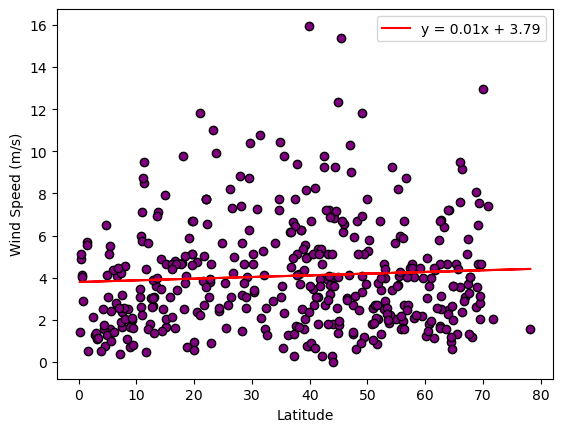

The r-value (correlation coefficient) is: 0.061925410012164804


In [40]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Perform linear regression
(slope, intercept, r_value, _, _) = linregress(x_values, y_values)

# Calculate the regression values for plotting
regression_line = x_values * slope + intercept

# Create a scatter plot
plt.scatter(x_values, y_values, color='purple', edgecolors='black')
plt.plot(x_values, regression_line, "r-", label=f"y = {slope:.2f}x + {intercept:.2f}")

# Annotate the plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.legend(loc='best')

# Show plot
plt.show()

# Print the R-value
print(f"The r-value (correlation coefficient) is: {r_value}")

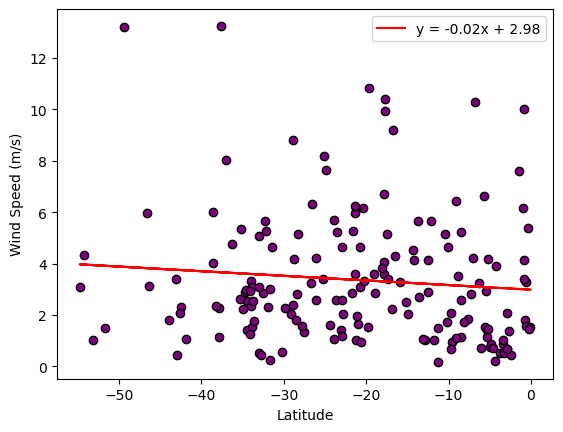

The r-value (correlation coefficient) is: -0.09625114980325448


In [41]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Perform linear regression
(slope, intercept, r_value, _, _) = linregress(x_values, y_values)

# Calculate the regression values for plotting
regression_line = x_values * slope + intercept

# Create a scatter plot
plt.scatter(x_values, y_values, color='purple', edgecolors='black')
plt.plot(x_values, regression_line, "r-", label=f"y = {slope:.2f}x + {intercept:.2f}")

# Annotate the plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.legend(loc='best')

# Show plot
plt.show()

# Print the R-value
print(f"The r-value (correlation coefficient) is: {r_value}")

**Discussion about the linear relationship:**

Northern Hemisphere:
    An R-value of 0.06 indicates an extremely weak positive correlation between wind speed and latitude.
    The scatter plot is scattered without a clear pattern, showing no significant linear relationship between these variables.
    This weak correlation suggests that latitude has little to no influence on wind speed in the Northern Hemisphere.
    
Southern Hemisphere:
    An R-value of -0.09 indicates an extremely weak negative correlation between wind speed and latitude.
    The scatter plot also appears scattered, with no distinct linear trend visible.
    As in the Northern Hemisphere, this weak correlation suggests that wind speed is largely influenced by other factors.

In summary, the analysis shows that both hemispheres have very weak correlations between wind speed and latitude, implying that wind patterns are driven by other factors.